# Hands-On 3: **k-Means**

**Alumno:** Fernando Sinoé Luna García.

**Materia:** Clasificación inteligente de datos.

**Profesor:** Jose Antonio Aviña Mendez

### Fundamentos de la técnica.

**K-Means** agrupa datos en K clústeres minimizando la suma de distancias cuadráticas a los centroides. Itera entre asignar cada punto al centroide más cercano y actualizar centroides como promedios.

### Modelo Matemático
Sea:

$$ X = \{x_1, \dots, x_n\} \subset \mathbb{R}^d $$

y un número de clústeres:

$$ K $$

El objetivo de **K-Means** es encontrar una partición:

$$ \{C_1, \dots, C_K\} $$

y centroides:

$$ \{\mu_1, \dots, \mu_K\} $$

que minimicen la **Suma Intra–Clúster de Cuadrados** (Within-Cluster Sum of Squares, WCSS):

$$
\min_{\{C_i\}, \{\mu_i\}} J \;=\; \sum_{i=1}^{K} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
$$

---

### Forma con variables de asignación

Definimos:

$$ z_{ij} \in \{0,1\} $$

tal que $$z_{ij}= 1 \ si \  x_j$$ pertenece al clúster \(i\) y 0 en otro caso, con la siguiente restricción:

$$
\sum_{i=1}^{K} z_{ij} = 1 \quad \forall j
$$

Entonces la función objetivo es:

$$
\min_{Z, \{\mu_i\}} J(Z, \mu) = \sum_{i=1}^{K} \sum_{j=1}^{n} z_{ij} \|x_j - \mu_i\|^2
$$

sujeto a:

$$
z_{ij} \in \{0,1\}, \quad \sum_{i=1}^{K} z_{ij} = 1
$$

---

### Óptimo en $$\mu_i$$ con $$Z$$ fijo

Cada centroide es el promedio de su clúster:

$$
\mu_i^* = \frac{\sum_{j=1}^{n} z_{ij} x_j}{\sum_{j=1}^{n} z_{ij}}
$$

---

### Algoritmo de Lloyd (iterativo)

1. **Asignación**

$$
z_{ij} = 1 \iff i = \arg\min_k \|x_j - \mu_k\|^2
$$

2. **Actualización**

$$
\mu_i = \frac{\sum_{x_j \in C_i} x_j}{|C_i|}
$$

3. Repetir hasta convergencia (descenso de \(J\) o centroides estables)




### Descripción de la librería, clases, funciones en su respectiva sección


`sklearn.cluster.KMeans`               : Entrena un modelo de clustering basado en centroides.

`sklearn.preprocessing.StandardScaler`: Normaliza los datos para que todas las variables aporten de forma similar.

`sklearn.metrics.confusion_matrix`: Compara clustering con etiquetas reales para validar patrones.

`sklearn.metrics.accuracy_score`: Mide la tasa de aciertos.

n_clusters: número de grupos, en este caso 3 que son los arquetipos.

random_state=42: para reproducir el resultado.

def predecir_patron: función que escala el patrón enviado, hace la predicción del cluster al que pertenece, y lo mapea para retornar la etiqueta a la que pertenece.


## Preprocesamiento

Aquí cargamos el dataset para identificar los arquetipos de personalidad según ciertas características.
Realizamos un previo análisis estadístico para determinar el comportamiento del dataset y observar si ninguna variable puede afectar en mucha medida al entrenar al modelo de clustering. Y tenemos un gráfico de dispersión que nos permite ver la dependencia entre dos variables, por la que vemos aquí, los datos mantienen un patrón constante y no estan todos revueltos, por ende, dichas variables pueden funcionar.

,Logica,Creatividad,Empatia,Organizacion,Arquetipo
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.345500,6.139000,6.897500,6.422500,0.975000
std,1.819128,1.924943,1.879844,1.484508,0.823264
min,2.000000,2.200000,2.100000,2.300000,0.000000
25%,5.000000,4.775000,5.400000,5.475000,0.000000
50%,6.000000,6.100000,7.400000,6.650000,1.000000
75%,7.925000,7.700000,8.300000,7.425000,2.000000
max,10.000000,10.000000,10.000000,9.300000,2.000000


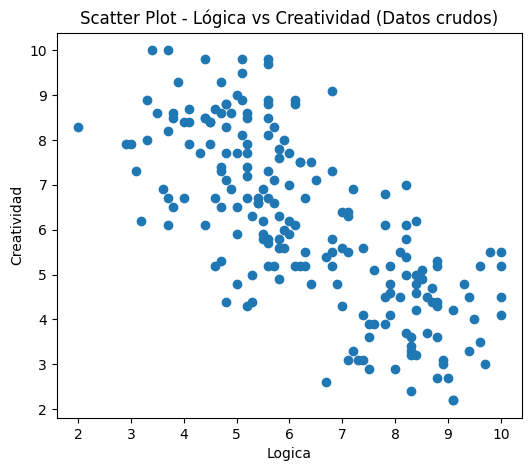

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("arquetipos_200.csv")

display(df.describe())

X = df[['Logica','Creatividad','Empatia','Organizacion']]
y_real = df['Arquetipo']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(df['Logica'], df['Creatividad'])
plt.xlabel("Logica")
plt.ylabel("Creatividad")
plt.title("Scatter Plot - Lógica vs Creatividad (Datos crudos)")
plt.show()


## Model Training

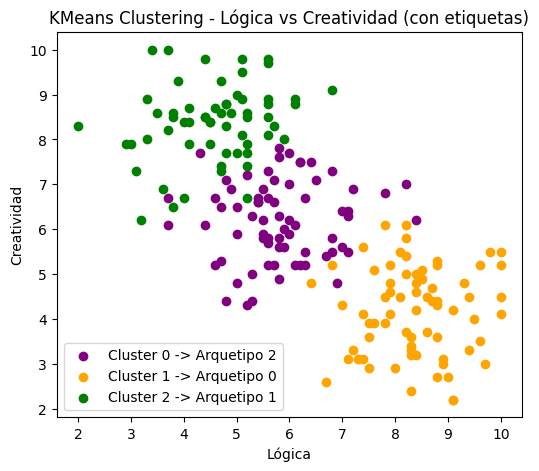

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

y_pred_cluster = kmeans.labels_

import numpy as np
colors = ['purple','orange','green']

mapping = {}
for cluster_id in np.unique(y_pred_cluster):
    mask = (y_pred_cluster == cluster_id)
    mapping[cluster_id] = y_real[mask].mode()[0]

y_pred_final = np.array([mapping[c] for c in y_pred_cluster])

plt.figure(figsize=(6,5))
for cluster_id in np.unique(y_pred_cluster):
    cluster_points = df[y_pred_cluster == cluster_id]
    plt.scatter(cluster_points['Logica'], cluster_points['Creatividad'],
                color=colors[cluster_id], label=f"Cluster {cluster_id} -> Arquetipo {mapping[cluster_id]}")

plt.xlabel("Lógica")
plt.ylabel("Creatividad")
plt.title("KMeans Clustering - Lógica vs Creatividad (con etiquetas)")
plt.legend()
plt.show()

## Prediction

Cómo ya mencioné en la descripción de las funciones, en este caso pasamos el patron a predecir, lo escalamos con scaler.transform para escalarlo con la misma escala con la que se entrenó el modelo, obtenemos dicho cluster y lo mapeamos en función de las etiquetas de nuestro dataset y obtendremos la etiqueta a la que pertenece, en este caso fue de tipo 2, esto quiere decir que el patrón que reonoció para este fue el arquetipo "Conector" que son aquellos que tienen un valor alto en la característica de "empatia".

In [19]:
def predecir_patron(patron):
    patron_scaled = scaler.transform([patron])
    cluster = kmeans.predict(patron_scaled)[0]
    arquetipo_pred = mapping[cluster]
    return arquetipo_pred

print("Predicción del patrón en base al arquetipo:", predecir_patron([8.0,4.2,9.0,3.5]))



Predicción del patrón en base al arquetipo: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Model Evaluation

Como K-Means es no supervisado, se compara cluster vs etiqueta real para medir qué tan bien reflejó el patrón de clases reales del dataset.

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_real, y_pred_final)
acc = accuracy_score(y_real, y_pred_final)

print("Matriz de Confusión:")
print(cm)
print("\nAccuracy:", acc)



Matriz de Confusión:
[[70  0  0]
 [ 0 60  5]
 [ 0  0 65]]

Accuracy: 0.975


### Conclusiones

KMeans logró agrupar patrones de forma no supervisada, y tras mapear los clusters a etiquetas reales, se obtuvo una precisión realista. Esto indica que los atributos usados contienen suficientes patrones cómo para que k-Means pueda agruparlos de manera precisa. Con algunos fallos cómo se puede ver en la matriz de confusión, pero lo hizo bien, demostrando que k-Means no necesita de etiquetas para poder clasificar datos, y aprendió a clasificar por arquetipo de personalidad.

## Referencias bibliográficas

- scikit-learn — KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- scikit-learn — Clustering: https://scikit-learn.org/stable/modules/clustering.html

- Avina Mendez, J. A. (n.d.). Perceptron [Presentación].
- Google. (n.d.). Gemini.